In [1]:
!pip install ipympl

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import numpy as np
from stoneforge.io.dlisio_r import inspect_dlis_structure, parse_dlis
import pandas as pd

info = inspect_dlis_structure(r"C:\Users\mario\Desktop\br_dlis\IODP_311-U1325A_rab-proc.dlis", verbose=False)
print(info)

{'LogicalFile(RAB_shallow)': {'B77185': ['TDEP', 'BSIM', 'BSAV'], 'B77226': ['TDEP', 'DEVI', 'HAZI', 'RB', 'P1NO', 'P1AZ', 'GR']}, 'LogicalFile(RAB_medium)': {'B77185': ['TDEP', 'BMIM', 'BMAV'], 'B77226': ['TDEP', 'DEVI', 'HAZI', 'RB', 'P1NO', 'P1AZ', 'GR']}, 'LogicalFile(RAB_deep)': {'B77185': ['TDEP', 'BDIM', 'BDAV'], 'B77226': ['TDEP', 'DEVI', 'HAZI', 'RB', 'P1NO', 'P1AZ', 'GR']}}


In [3]:
def _dict_to_dataframe(data):
    rows = []
    for digital_file, frames in data.items():
        for frame_name, mnemonics in frames.items():
            for mnemonic in mnemonics:  # Each mnemonic gets its own row
                rows.append([digital_file, frame_name, mnemonic])
    df = pd.DataFrame(rows, columns=["Digital File", "Frame Name", "Mnemonics"])
    return df

def _dataframe_to_dict(df):
    data = {}
    for digital_file, frame_group in df.groupby("Digital File"):
        data[digital_file] = {}
        for frame_name, mnemonics_group in frame_group.groupby("Frame Name"):
            data[digital_file][frame_name] = mnemonics_group["Mnemonics"].tolist()
    return data

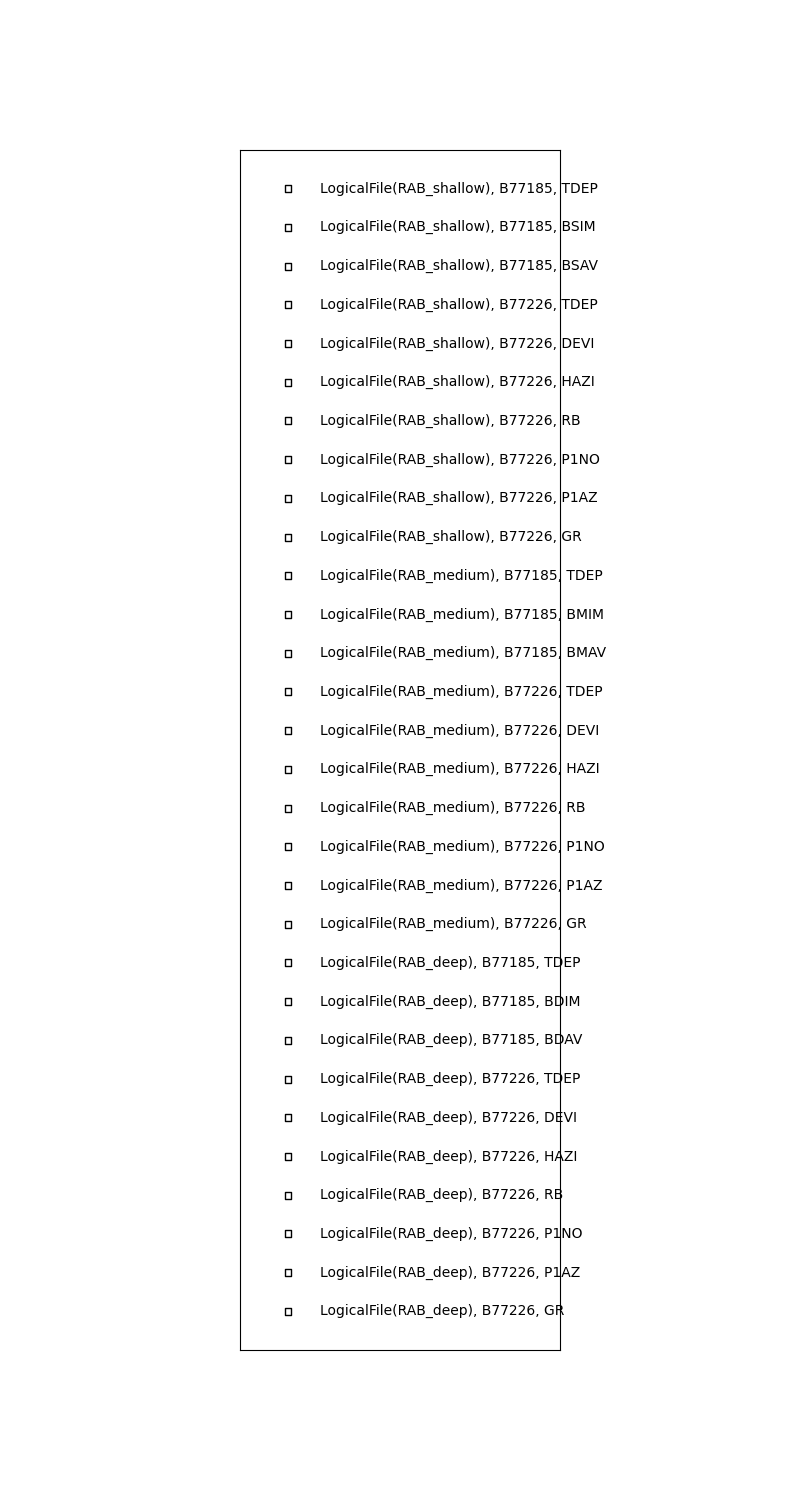

In [6]:
table = _dict_to_dataframe(info)

num_rows = len(table)
fig_height = max(6, num_rows * 0.5)

fig, ax = plt.subplots(figsize=(8, fig_height))
ax.axis('off')  # Hide the axes

checkbox_labels = [', '.join(row) for row in table.values]
checkbox_ax = fig.add_axes([0.3, 0.1, 0.4, 0.8])
checkboxes = CheckButtons(checkbox_ax, checkbox_labels, [False] * len(checkbox_labels))

checkbox_states = [False] * len(checkbox_labels)

def toggle_row(label):
    index = checkbox_labels.index(label)
    checkbox_states[index] = not checkbox_states[index]
    print(f'{label} is {"checked" if checkbox_states[index] else "unchecked"}')

checkboxes.on_clicked(toggle_row)
plt.show()

table_rows = np.array(np.linspace(0, len(checkbox_states)-1, len(checkbox_states)),dtype = int)
selected_rows = table_rows[checkbox_states]
selected_table = table.iloc[selected_rows]
dict_data_info = _dataframe_to_dict(selected_table)

In [ ]:
data_access = {
    'LogicalFile(RAB_shallow)':{
        'B77185':['TDEP','BSAV'],
        'B77226':['TDEP','RB','GR']
        },
    'LogicalFile(RAB_medium)':{
        'B77185':['TDEP','BMIM'],
        'B77226':['TDEP','GR']
        },
    'LogicalFile(RAB_deep)':{
        'B77226':['TDEP','GR'] 
        }
    }

data1 = parse_dlis("D:\dlis_samples\IODP_311-U1325A_rab-proc.dlis", data_access)
TDEP = data1['LogicalFile(RAB_shallow)']['B77185']['TDEP']['values']
TDEP_unit = data1['LogicalFile(RAB_shallow)']['B77185']['TDEP']['unit']
BSAV = data1['LogicalFile(RAB_shallow)']['B77185']['BSAV']['values']
BSAV_unit = data1['LogicalFile(RAB_shallow)']['B77185']['BSAV']['unit']
plt.plot(BSAV,TDEP)
plt.xlim(0.5,2.5)
plt.xlabel(BSAV_unit)
plt.ylabel(TDEP_unit)
plt.grid()
plt.show()

In [ ]:
data2 = parse_dlis("D:\dlis_samples\IODP_311-U1325A_rab-proc.dlis", data_access)
BMIM = data1['LogicalFile(RAB_medium)']['B77185']['BMIM']['values']
BMIM_unit = data1['LogicalFile(RAB_medium)']['B77185']['BMIM']['unit']

BMIM[BMIM <= -999.] = np.nan

plt.matshow(BMIM, interpolation='nearest', aspect='auto', vmin=0, vmax=3)
plt.show()